# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import RFE

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier

import xgboost
import scipy
from matplotlib import pylab

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids=test['Loan_ID']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.describe(include=np.object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002418,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Checking for Duplicates

In [5]:
print('Train Data Size {}'.format(df.shape))
if(any(df.duplicated())==True):
    print('Duplicate rows found')
    print('Number of duplicate rows= ',df[df.duplicated()].shape[0])
    df.drop_duplicates(inplace=True,keep='first')
    df.reset_index(inplace=True,drop=True)
    print('Dropping duplicates\n')
    print(df.shape)
else:
    print('NO duplicate data')
    
print('\nTest Data Size {}'.format(test.shape))
if(any(test.duplicated())==True):
    print('Duplicate rows found')
    print('Number of duplicate rows= ',test[test.duplicated()].shape[0])
else:
    print('NO duplicate data')

Train Data Size (614, 13)
NO duplicate data

Test Data Size (367, 12)
NO duplicate data


# Checking for Missing Data

In [6]:
print('TRAIN DATA- ',end=' ')
if(any(df.isnull().any())):
    print('Missing Data\n')
    print(df.isnull().sum())
else:
    print('NO missing data')
    
print('\nTEST DATA- ',end=' ')
if(any(test.isnull().any())):
    print('Missing Data\n')
    print(test.isnull().sum())
else:
    print('NO missing data')

TRAIN DATA-  Missing Data

Loan_ID              0 
Gender               13
Married              3 
Dependents           15
Education            0 
Self_Employed        32
ApplicantIncome      0 
CoapplicantIncome    0 
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area        0 
Loan_Status          0 
dtype: int64

TEST DATA-  Missing Data

Loan_ID              0 
Gender               11
Married              0 
Dependents           10
Education            0 
Self_Employed        23
ApplicantIncome      0 
CoapplicantIncome    0 
LoanAmount           5 
Loan_Amount_Term     6 
Credit_History       29
Property_Area        0 
dtype: int64


In [7]:
df.dtypes

Loan_ID              object 
Gender               object 
Married              object 
Dependents           object 
Education            object 
Self_Employed        object 
ApplicantIncome      int64  
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        object 
Loan_Status          object 
dtype: object

# Dealing with Missing Data

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['LoanAmount'].mode()[0])


test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Married'] = test['Married'].fillna(test['Married'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['LoanAmount'].mode()[0])

# Dealing with Categorical Data

In [9]:
# Can also use One Hot Encoding (OHE) or Label Encoding

df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Married'] = df['Married'].map({'Yes':1,'No':0})
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})
df.drop(columns='Loan_ID',inplace=True)

test['Gender'] = test['Gender'].map({'Male':1,'Female':0})
test['Married'] = test['Married'].map({'Yes':1,'No':0})
test['Dependents'] = test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
test['Education'] = test['Education'].map({'Graduate':1,'Not Graduate':0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1,'No':0})
test['Property_Area'] = test['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
test.drop(columns='Loan_ID',inplace=True)

# Exploratory Data Analysis (EDA)

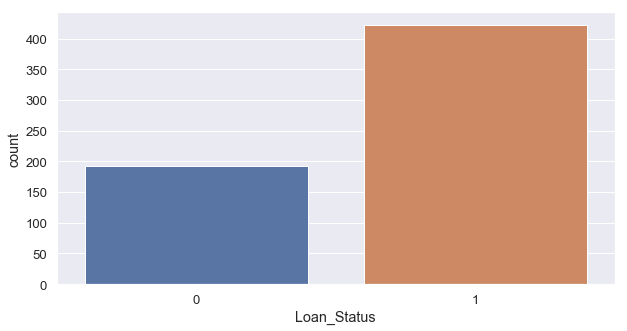

In [10]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,5))
sns.countplot(df['Loan_Status'])

In [11]:
loan_status_dist=df['Loan_Status'].value_counts()
print(loan_status_dist)
print('\nNO  (0) class {:0.2f}%'.format(100 *loan_status_dist[0] / (loan_status_dist[0]+loan_status_dist[1])))
print('YES (1) class {:0.2f}%'.format(100 *loan_status_dist[1] / (loan_status_dist[0]+loan_status_dist[1])))

1    422
0    192
Name: Loan_Status, dtype: int64

NO  (0) class 31.27%
YES (1) class 68.73%


# Univariate Analysis of Categorical Features

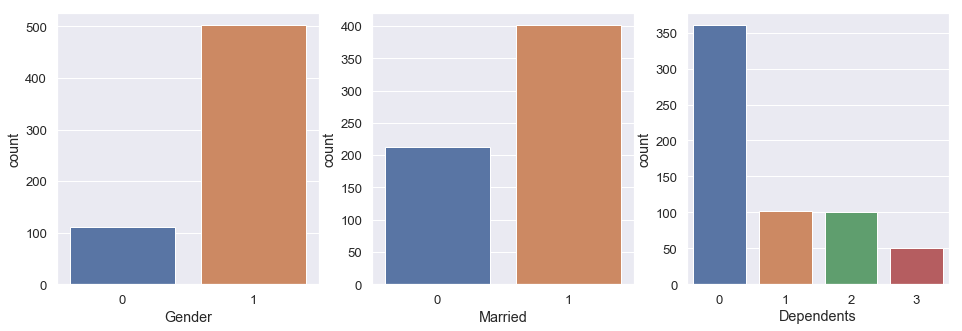

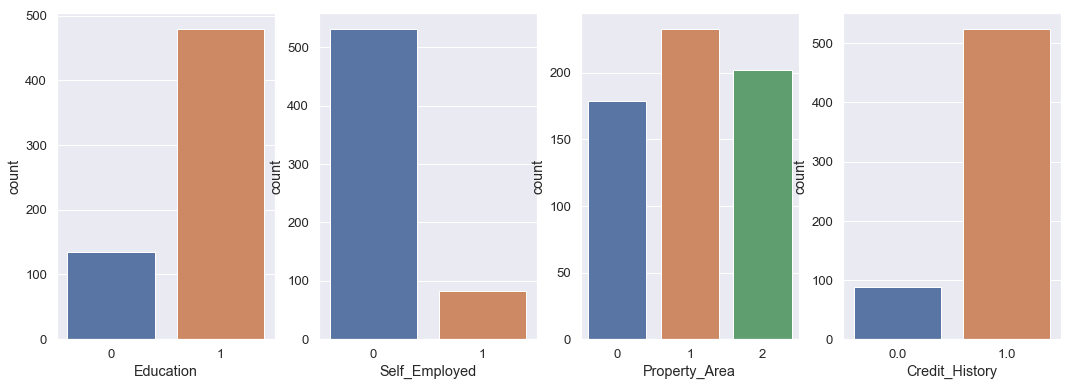

In [12]:
plt.figure(figsize=(16,5))

sns.set(font_scale=1.2)
plt.subplot(131)
sns.countplot(df['Gender'])

plt.subplot(132)
sns.countplot(df['Married'])

plt.subplot(133)
sns.countplot(df['Dependents'])

plt.figure(figsize=(18,6))
plt.subplot(141)
sns.countplot(df['Education'])

plt.subplot(142)
sns.countplot(df['Self_Employed'])

plt.subplot(143)
sns.countplot(df['Property_Area'])

plt.subplot(144)
sns.countplot(df['Credit_History'])

# Univariate Analysis of Continuous Features

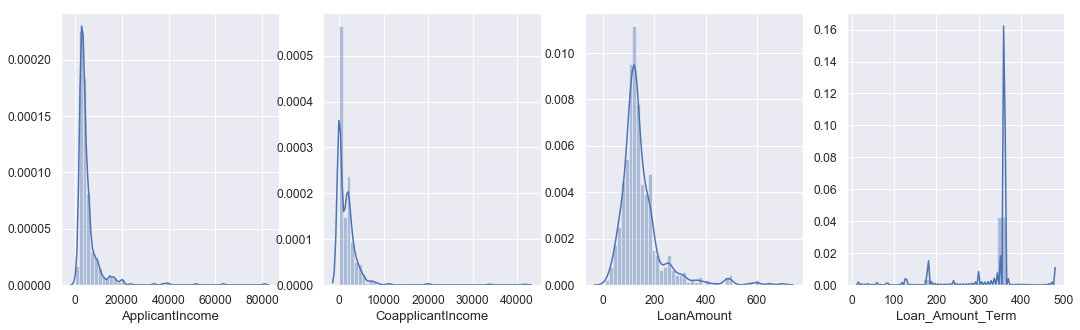

In [13]:
sns.set(font_scale=1.1)
plt.figure(figsize=(18,5))


plt.subplot(141)
sns.distplot(df['ApplicantIncome'])

plt.subplot(142)
sns.distplot(df['CoapplicantIncome'])

plt.subplot(143)
sns.distplot(df['LoanAmount'])

plt.subplot(144)
sns.distplot(df['Loan_Amount_Term'])

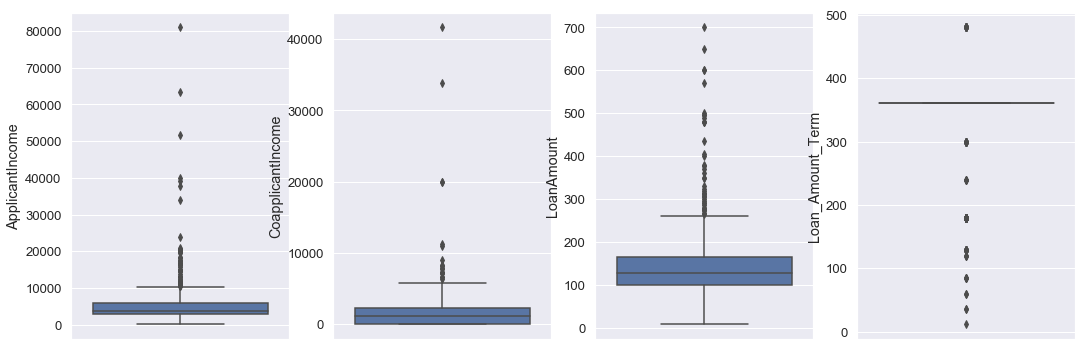

In [14]:
sns.set(font_scale=1.2)
plt.figure(figsize=(18,6))

plt.subplot(141)
sns.boxplot(y=df['ApplicantIncome'])

plt.subplot(142)
sns.boxplot(y=df['CoapplicantIncome'])

plt.subplot(143)
sns.boxplot(y=df['LoanAmount'])

plt.subplot(144)
sns.boxplot(y=df['Loan_Amount_Term'])

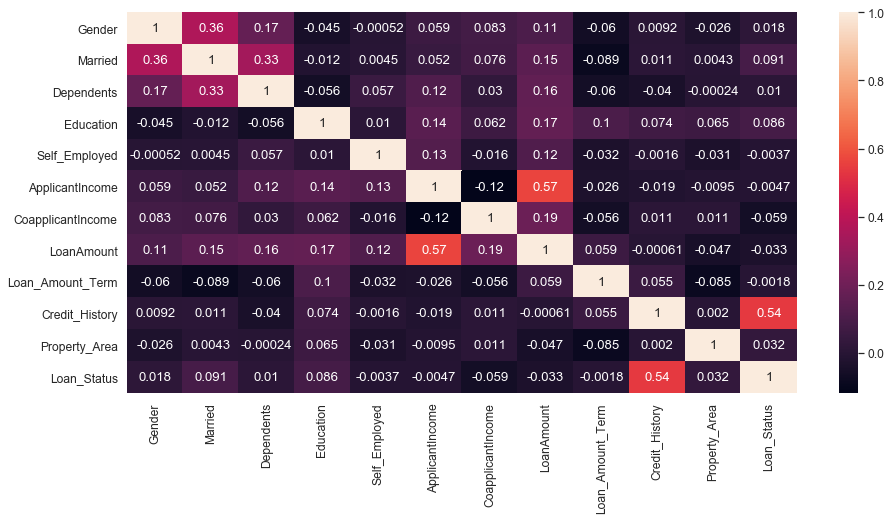

In [15]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.1)
sns.heatmap(df.corr(),annot=True)

# Feature Engineering

In [16]:
# if male and married -> 1
#df['gender_married'] = np.array(df['Gender'].tolist()) & np.array(df['Married'].tolist())
#test['gender_married'] = np.array(test['Gender'].tolist()) & np.array(test['Married'].tolist())


df['total_income'] = np.array(df['ApplicantIncome'].tolist()) + np.array(df['CoapplicantIncome'].tolist())
test['total_income'] = np.array(test['ApplicantIncome'].tolist()) + np.array(test['CoapplicantIncome'].tolist())

# df['emi']=1000*df['LoanAmount']/df['Loan_Amount_Term']
# test['emi']=1000*test['LoanAmount']/test['Loan_Amount_Term']


# df['total_income']=np.log(df['total_income'])
# test['total_income']=np.log(test['total_income'])

# df['Balance Income']=df['total_income']-(df['emi'])
# test['Balance Income']=test['total_income']-(test['emi'])

# df['emi']=np.log(df['emi'])
# test['emi']=np.log(test['emi'])

# Feature Scaling

In [17]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
# #mms = MinMaxScaler()
sc = StandardScaler()
df[cols]=sc.fit_transform(df[cols])
test[cols]=sc.fit_transform(test[cols])

In [18]:
x=df.drop(columns='Loan_Status')
y=df['Loan_Status']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100,stratify=y)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(491, 12) (491,)
(123, 12) (123,)


In [20]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,1,0,0,1,0,0.072991,-0.554487,-0.211241,0.318587,1.0,2,1,5849.0
1,1,1,1,1,0,-0.134412,-0.038732,-0.211241,0.318587,1.0,0,0,6091.0
2,1,1,0,1,1,-0.393747,-0.554487,-0.948996,0.318587,1.0,2,1,3000.0


# K-Fold Cross Validation

In [21]:
kfold = KFold(n_splits=5,shuffle=True,random_state=100)

results = pd.DataFrame(columns=['MODEL','MEAN ACCURACY','MEDIAN ACCURACY','Accuracy Score'])

models_name = ['knn','logistic regression','gaussian naive bayes','xgboost','adaboost','bagging classifier',
               'gradient boosting','random forest','decision tree','lightgbm','svm(linear)','svm(rbf)']


model_list= [KNeighborsClassifier(),LogisticRegression(),GaussianNB(),XGBClassifier(),AdaBoostClassifier(),
             BaggingClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),
             LGBMClassifier(),SVC(kernel='linear'),SVC()]


for idx,model in enumerate(model_list):
    score=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=kfold,n_jobs=-1,verbose=1)
    results.loc[idx] = [models_name[idx],score.mean(),np.median(score),score]

results.sort_values(by='MEDIAN ACCURACY',inplace=True,ascending=False)
results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

,MODEL,MEAN ACCURACY,MEDIAN ACCURACY,Accuracy Score
1,logistic regression,0.808534,0.818182,"[0.8181818181818182, 0.8367346938775511, 0.7755102040816326, 0.826530612244898, 0.7857142857142857]"
3,xgboost,0.788147,0.806122,"[0.8080808080808081, 0.8367346938775511, 0.7244897959183674, 0.8061224489795918, 0.7653061224489796]"
2,gaussian naive bayes,0.796392,0.795918,"[0.7676767676767676, 0.8367346938775511, 0.7653061224489796, 0.8163265306122449, 0.7959183673469388]"
10,svm(linear),0.796331,0.795918,"[0.797979797979798, 0.826530612244898, 0.7755102040816326, 0.7959183673469388, 0.7857142857142857]"
9,lightgbm,0.763719,0.777778,"[0.7777777777777778, 0.7959183673469388, 0.7346938775510204, 0.8061224489795918, 0.7040816326530612]"
4,adaboost,0.765760,0.775510,"[0.7777777777777778, 0.8061224489795918, 0.7244897959183674, 0.7448979591836735, 0.7755102040816326]"
6,gradient boosting,0.771923,0.765306,"[0.7575757575757576, 0.826530612244898, 0.7244897959183674, 0.7857142857142857, 0.7653061224489796]"
7,random forest,0.755535,0.765306,"[0.7878787878787878, 0.7653061224489796, 0.7040816326530612, 0.7959183673469388, 0.7244897959183674]"
5,bagging classifier,0.729128,0.734694,"[0.7272727272727273, 0.7346938775510204, 0.7040816326530612, 0.7448979591836735, 0.7346938775510204]"
8,decision tree,0.698598,0.704082,"[0.6868686868686869, 0.7857142857142857, 0.7040816326530612, 0.7244897959183674, 0.5918367346938775]"


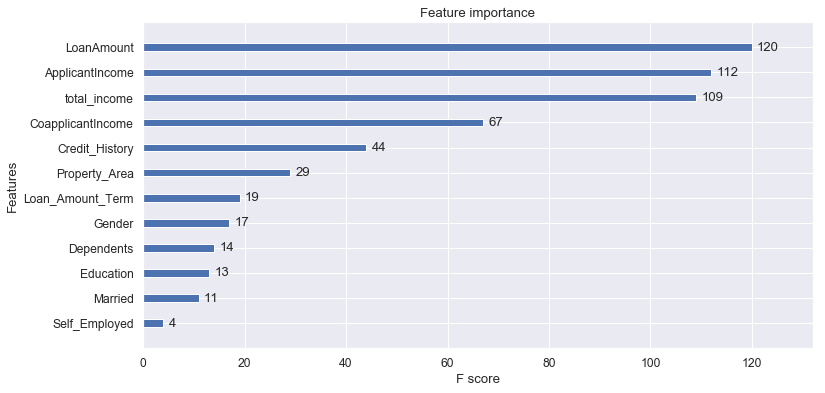

In [22]:
model=XGBClassifier()
model.fit(x_train,y_train)
fig, ax = plt.subplots(figsize=(12, 6)) 
xgboost.plot_importance(model, ax=ax,height=0.3)

In [23]:
model = XGBClassifier()
model.fit(x.values,y)

ans = pd.DataFrame({'Loan_ID':ids,'Loan_Status':pd.Series(model.predict(test.values)).map({1:'Y',0:'N'})})
ans.to_csv('ans_xgboost.csv',index=None)

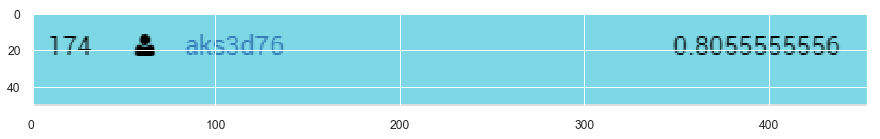

In [24]:
img=plt.imread('accuracy.PNG')
plt.figure(figsize=(15,5))
plt.imshow(img)

# `Rank 174 out of 4900+ Participants ;) `

# FURTHER IMPROVEMENTS

<div class="alert alert-block alert-warning">
<ul style="font-size:18px;color:red"> 
    <li> Doing better feature engineering (calculating emi, binning loan amount & balance income etc...)</li>
    <br>
    <li> Feature Transformation (log,sqrt,sin,cos,boxcox...) </li>
    <br>
    <li> Stacking Different Models </li>
    <br>
    <li> Preventing the Imbalance in target classes using Sampling Techniques (eg- SMOTE) </li>
    <br>
    <li> Fine Tuning Hyperparameters using GridSearchCV </li>
</ul>
</div>


## `I have tried above approaches but the accuracy didn't improve :( `

## `If you're able to improve the accuracy , please share your approach ;)`

#  THANK YOU !! 